<a href="https://colab.research.google.com/github/mohameds277/Machine_learning/blob/main/Machine_Learning_and_Data_Science_Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning and Data Science ‐ ENCS5341**

Mohamed Shqierat 1190702

# **Model Selection and Hyper-parameters Tunning**!

**The data_reg.csv file contains a set of 200 examples. Each row represents one
example which has two attributes x1 and x2, and a continuous target label y.
Using python, implement the solution of the following tasks:**

**1- Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40
examples). Plot the examples from the three sets in a scatter plot (each set
encoded with a different color). Note that the plot here will be 3D plot where
the x and y axes represent the x1 and x2 features, whereas the z-axis is the
target label y.**

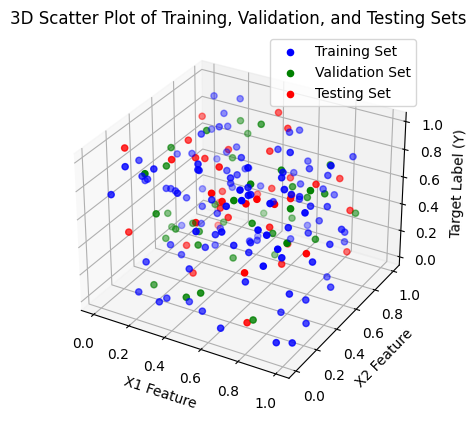

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D



data_frame = pd.read_csv("data_reg.csv")



training_set = data_frame[:120]
validation_set = data_frame[120:160]
testing_set = data_frame[160:]

training_set_3d = np.random.rand(120, 3)
validation_set_3d = np.random.rand(40, 3)
testing_set_3d = np.random.rand(40, 3)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(training_set_3d[:, 0], training_set_3d[:, 1], training_set_3d[:, 2], c='blue', label='Training Set')
ax.scatter(validation_set_3d[:, 0], validation_set_3d[:, 1], validation_set_3d[:, 2], c='green', label='Validation Set')
ax.scatter(testing_set_3d[:, 0], testing_set_3d[:, 1], testing_set_3d[:, 2], c='red', label='Testing Set')

ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Target Label (Y)')
ax.legend()
plt.title('3D Scatter Plot of Training, Validation, and Testing Sets')
plt.show()





**2 - Apply polynomial regression on the training set with degrees in the range of 1
to 10. Which polynomial degree is the best? Justify your answer by plotting the
validation error vs polynomial degree curve. For each model plot the surface of
the learned function alongside with the training examples on the same plot.**

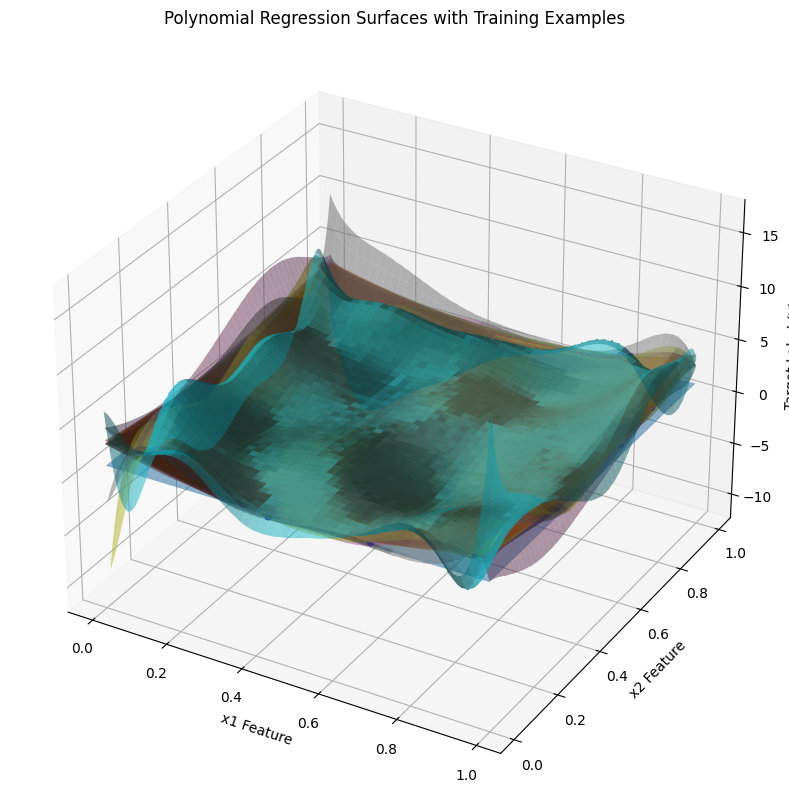

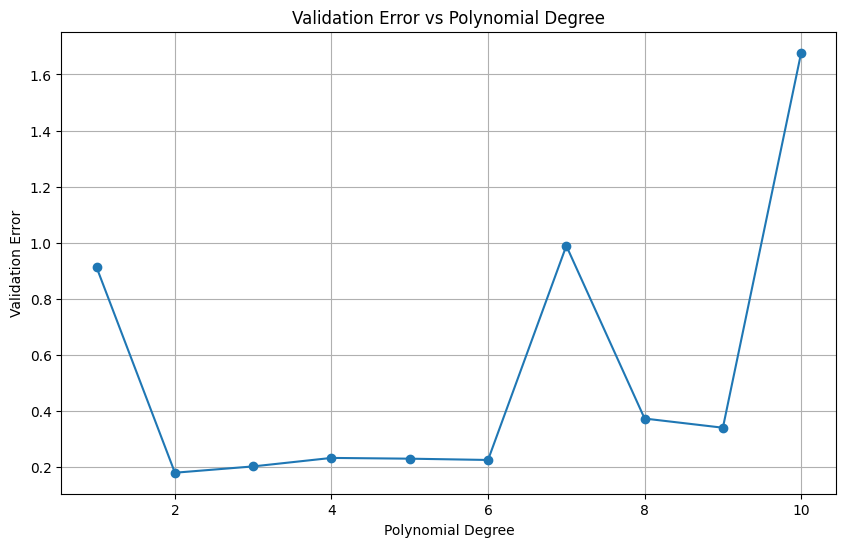

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


X_train = training_set[['x1', 'x2']].values
Y_train = training_set['y'].values

X_val = validation_set[['x1', 'x2']].values
Y_val = validation_set['y'].values

degrees = np.arange(1, 11)


# validation errors and learning surfaces list
validation_errors = []
learned_surfaces = []


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, c='blue', label='Training Set')

for degree in degrees:

    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_val = poly_features.transform(X_val)


    model = LinearRegression()
    model.fit(X_poly_train, Y_train)


    Y_val_pred = model.predict(X_poly_val)
    validation_error = mean_squared_error(Y_val, Y_val_pred)
    validation_errors.append(validation_error)


    x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    X_poly_mesh = poly_features.transform(X_mesh)
    Y_pred_mesh = model.predict(X_poly_mesh)


    ax.plot_surface(x1_mesh, x2_mesh, Y_pred_mesh.reshape(x1_mesh.shape), alpha=0.5, label=f'Degree {degree}')
    learned_surfaces.append(Y_pred_mesh.reshape(x1_mesh.shape))


ax.set_xlabel('x1 Feature')
ax.set_ylabel('x2 Feature')
ax.set_zlabel('Target Label (Y)')
plt.title('Polynomial Regression Surfaces with Training Examples')

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, validation_errors, marker='o')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error')
plt.grid(True)
plt.show()

**As concluded from the above graph , the second degree polynomial regression is considred the best , becuase this degree has the lowest validation error among other degress.**

**3- Apply ridge regression on the training set to fit a polynomial of degree 8. For
the regularization parameter, choose the best value among the following
options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the
regularization parameter.**

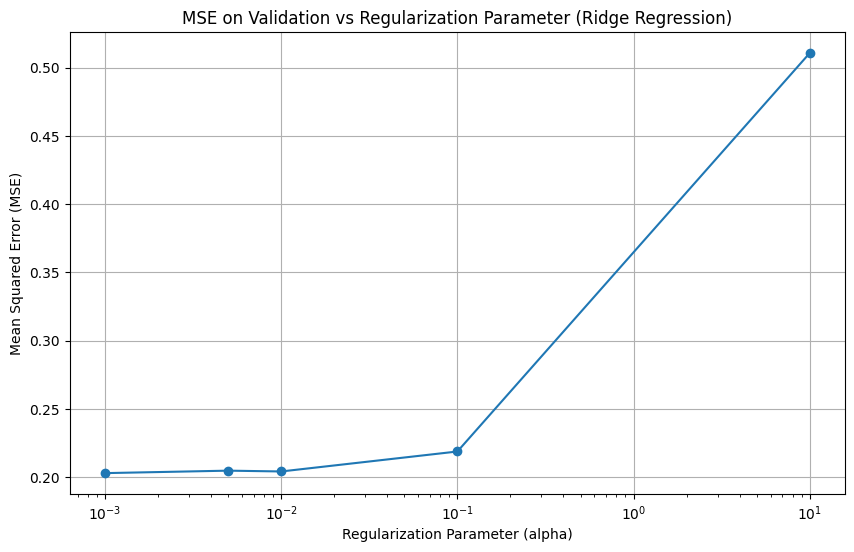

In [16]:
from sklearn.linear_model import Ridge


options_values = [0.001, 0.005, 0.01, 0.1, 10]

MSE_values = []


for value in options_values:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_val = poly_features.transform(X_val)

    model = Ridge(alpha=value)
    model.fit(X_poly_train, Y_train)

    Y_val_pred = model.predict(X_poly_val)

    mse = mean_squared_error(Y_val, Y_val_pred)
    MSE_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(options_values, MSE_values, marker='o')
plt.xscale('log')
plt.title('MSE on Validation vs Regularization Parameter (Ridge Regression)')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


as a  conclusion  , when the alpha parameters increases , the MSE increases





---



Logistic Regression


**The train_cls.csv file contains a set of training examples for a binary classification
problem, and the testing examples are provided in the test_cls.csv file. The
following figures show these examples**

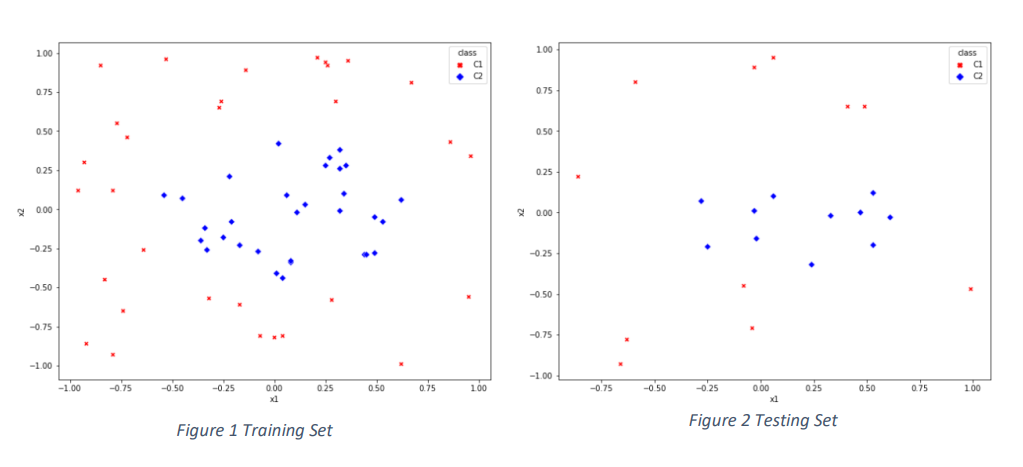

**1 - using the logistic regression implementation of scikit-learn library, Learn
a logistic regression model with a linear decision boundary. Draw the decision
boundary of the learned model on a scatterplot of the training set (similar to
Figure 1). Compute the training and testing accuracy of the learned model.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


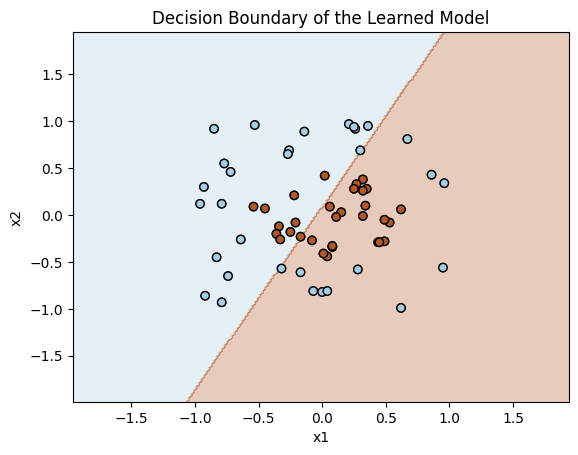

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

x_train = train_data[['x1', 'x2']]
y_train_str = train_data['class']

x_test = test_data[['x1', 'x2']]
y_test_str = test_data['class']

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_str)
y_test = label_encoder.transform(y_test_str)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

plt.scatter(x_train['x1'], x_train['x2'], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

h = .02
x_min, x_max = x_train['x1'].min() - 1, x_train['x1'].max() + 1
y_min, y_max = x_train['x2'].min() - 1, x_train['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z_str = label_encoder.inverse_transform(Z)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

plt.scatter(x_train['x1'], x_train['x2'], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

plt.title('Decision Boundary of the Learned Model')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()


In [43]:
y_train_pred = logistic_model.predict(x_train)

y_test_pred = logistic_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.66
Testing Accuracy: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


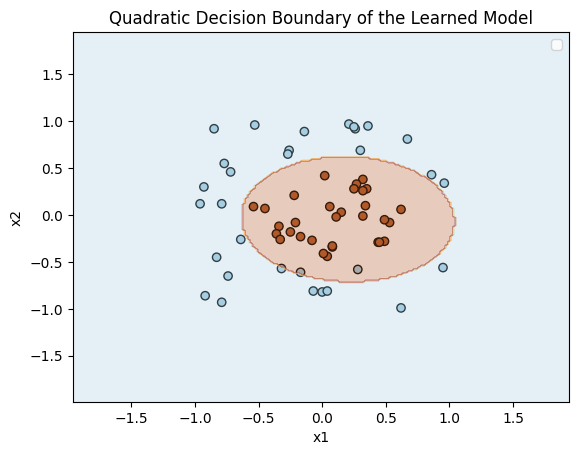

Quadratic Training Accuracy : 0.97
Quadratic Testing Accuracy : 0.95


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

logistic_model_poly = LogisticRegression()
logistic_model_poly.fit(x_train_poly, y_train)

plt.scatter(x_train['x1'], x_train['x2'], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')

h = .02
Z_poly = logistic_model_poly.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

Z_poly_str = label_encoder.inverse_transform(Z_poly)

Z_poly = Z_poly.reshape(xx.shape)
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.Paired, alpha=0.3)

plt.title('Quadratic Decision Boundary of the Learned Model')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

y_train_pred_poly = logistic_model_poly.predict(x_train_poly)
y_test_pred_poly = logistic_model_poly.predict(x_test_poly)

train_accuracy_poly = accuracy_score(y_train, y_train_pred_poly)
print(f'Quadratic Training Accuracy : {train_accuracy_poly:.2f}')

test_accuracy_poly = accuracy_score(y_test, y_test_pred_poly)
print(f'Quadratic Testing Accuracy : {test_accuracy_poly:.2f}')


**3 - comments**


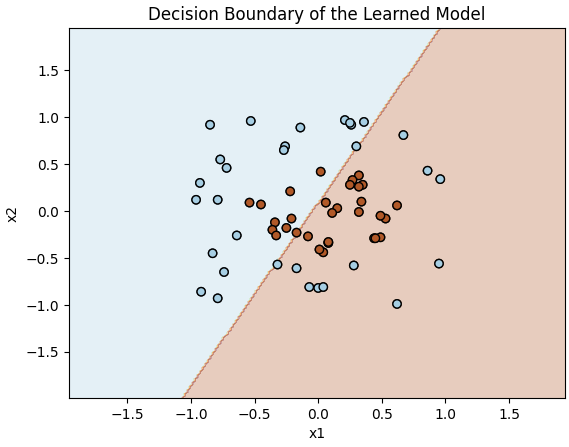

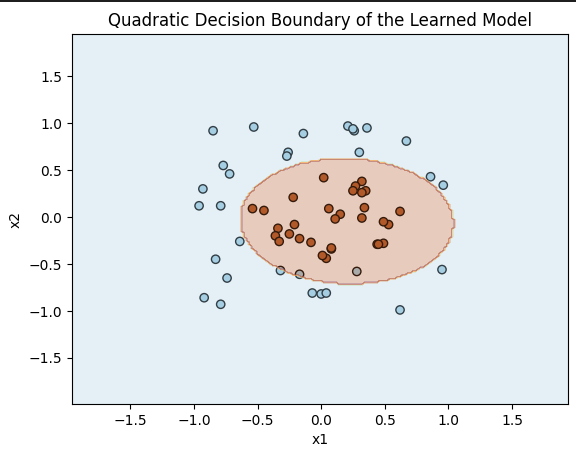

based on the accuracy of both models , the accuracy of the quadratic is better that the linear model , because the quadratic boundry contour contained most of the same class than in the linear boundry contour , so in term of Underfitting , the linear decision boundry suffers Underfitting because of the simple model that , this simplicity fails to describe the differences in the classes so the wrong classes entered the boundary of the opposing class and vise-versa . while in the quadratic decision boundry , the suffer is in the overfitting , but the suffer here is slightly smaller because the accuracy of the model is 97% training and 95% testing , as shown in the figure above shows almost 1 and half misclassified points.



---

